In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Hierarchical Clustering Scheme (HCS)

In unsupervised clustering, when dealing with a large number of objects, the similarity values between each pair of objects can form an enormous array. To make the underlying pattern or structure more evident, hierarchical clustering can be used, where the similarity measures are arranged into different rows according to their values or "strength."

### General Concept

Given $ N $ objects (represented by integers $ 1 $ through $ N $) and a sequence of $ m+1 $ clusterings, denoted by $ c_0, c_1, \dots, c_m $, where:
- $ c_0 $ is the weak clustering, where each object is a separate cluster.
- $ c_m $ is the strong clustering, where all objects are grouped into a single cluster.
- The dissimilarity measures $ \alpha_0, \alpha_1, \dots, \alpha_m $ are arranged in increasing order: $ \alpha_{i+1} \geq \alpha_i $.

In hierarchical clustering, the weak clustering starts with $ \alpha_0 = 0 $, and clusters are merged progressively based on increasing similarity until the strong clustering is reached.

### Methodology

1. **Define decision variables, feasible set, and objective functions**.
2. **Choose and apply a Pareto optimization algorithm** (e.g., NSGA-II).
3. **Clustering analysis**:
   - **Clustering tendency**: Visual inspection or data projections verify if hierarchical cluster structure is a reasonable model for the data.
   - **Data scaling**: Remove implicit variable weightings using range scaling.
   - **Proximity**: Select an appropriate similarity measure (e.g., Euclidean distance).
   - **Algorithm choice**: Select the suitable algorithm (e.g., group average linkage).
   - **Application**: Apply the chosen algorithm and generate a dendrogram.
   - **Validation**: Examine results, assess fit and stability, and compare results of multiple algorithms if needed.
4. **Represent and use clusters**: If the clustering is valid, examine the divisions in the hierarchy for trade-offs and decision-making.

### Example: Six Objects with Similarity Values

### Similarity Matrix

$$
\text{Similarity values} = 
\begin{aligned}
& 0.04 : (3, 6) \\
& 0.08 : (3, 5), (5, 6) \\
& 0.22 : (1, 3), (1, 5), (1, 6), (2, 4) \\
& 0.35 : (1, 2), (1, 4) \\
& > 0.35 : (2, 3), (2, 4), (2, 5), (3, 4), (4, 5), (4, 6)
\end{aligned}
$$

### Clustering Results

- At $ \alpha = 0.00 $:
  $$
  [1], [3], [5], [6], [4], [2]
  $$
- At $ \alpha = 0.04 $:
  $$
  [1], [3, 6], [2], [4], [5]
  $$
- At $ \alpha = 0.08 $:
  $$
  [3, 5, 6], [1], [2], [4]
  $$
- At $ \alpha = 0.22 $:
  $$
  [1, 3, 5, 6], [2, 4]
  $$
- At $ \alpha = 0.35 $:
  $$
  [1, 2, 3, 4, 5, 6]
  $$

### Distance Matrix Before Clustering

$$
d_{ij} = 
\begin{bmatrix}
  0.00 & 0.35 & 0.22 & 0.35 & 0.22 & 0.22 \\
  0.35 & 0.00 & 0.35 & 0.22 & 0.35 & 0.35 \\
  0.22 & 0.35 & 0.00 & 0.35 & 0.08 & 0.04 \\
  0.35 & 0.22 & 0.35 & 0.00 & 0.35 & 0.35 \\
  0.22 & 0.35 & 0.08 & 0.35 & 0.00 & 0.08 \\
  0.22 & 0.35 & 0.04 & 0.35 & 0.08 & 0.00 \\
\end{bmatrix}
$$

### Distance Matrix After First Clustering $[1], [2], [3, 6], [4], [5]$

$$
d_{ij} = 
\begin{bmatrix}
  0.00 & 0.35 & 0.22 & 0.35 & 0.22 \\
  0.35 & 0.00 & 0.35 & 0.22 & 0.35 \\
  0.22 & 0.35 & 0.00 & 0.35 & 0.08 \\
  0.35 & 0.22 & 0.35 & 0.00 & 0.35 \\
  0.22 & 0.35 & 0.08 & 0.35 & 0.00 \\
\end{bmatrix}
$$

### Distance Matrix After Second Clustering $[1], [2], [3, 5, 6], [4]$

$$
d_{ij} = 
\begin{bmatrix}
  0.00 & 0.35 & 0.22 & 0.35 \\
  0.35 & 0.00 & 0.35 & 0.22 \\
  0.22 & 0.35 & 0.00 & 0.35 \\
  0.35 & 0.22 & 0.35 & 0.00 \\
\end{bmatrix}
$$

### Ultrametric Inequality

In hierarchical clustering, the similarity function $ D(x, y) $ must satisfy:
- Symmetry: $ D(x, y) = D(y, x) $
- Ultrametric inequality:
  $$
  D(x, z) \leq \max\{D(x, y), D(y, z)\}
  $$
- Triangle inequality:
  $$
  D(x, z) \leq D(x, y) + D(y, z)
  $$

The distance matrix evolves as clusters merge. After each clustering, a new distance matrix is computed by finding the minimum or maximum distances between newly formed clusters and other objects.



## Minimum Method for Hierarchical Clustering

Given $ N $ objects and a similarity metric $ d = D(x, y) $ satisfying the ultrametric inequality, the minimum method for hierarchical clustering can be implemented as follows:

### Steps:

1. **Weak Clustering $ C_0 $**:  
   Start by initializing each object in its own cluster with a distance $ d(x, y) = 0 $ for all pairs $ x \neq y $:
   $$
   d(x, y) = 0, \quad \forall \, x \neq y
   $$
   This represents the weakest clustering where each object is isolated.

2. **Merge Clusters Based on Minimum Distance**:  
   For the current clustering $ C_{i-1} $, examine the distance matrix. Identify the smallest nonzero entry $ \alpha_i $ and merge the corresponding pair of objects or clusters:
   $$
   \alpha_i = \min(d(x, y)), \quad x \neq y
   $$
   This forms a new clustering $ C_i $ with distance $ \alpha_i $.

3. **Update the Distance Matrix**:  
   After merging, update the distance matrix. The distance between the new cluster $ [x, y] $ and any other cluster $ z $ is calculated as the minimum of the distances from $ x $ or $ y $ to $ z $:
   $$
   d([x, y], z) = \min(d(x, z), d(y, z))
   $$

4. **Repeat Until One Cluster Remains**:  
   Continue merging the closest pairs and updating the distance matrix until all objects are grouped into a single cluster.

### Example:
If we start with 6 objects, we can follow these steps to form the hierarchical clusters:
1. Initially, each object is its own cluster.
2. The closest pair of clusters is merged.
3. The process continues until all objects are merged into a single cluster.

The output can be represented as a dendrogram where the height of the branches represents the distances $ \alpha_i $ at which clusters were merged.

### Ultrametric Inequality
The ultrametric inequality ensures that for any three objects $ x $, $ y $, and $ z $, the distance satisfies:
$$
D(x, z) \leq \max\{D(x, y), D(y, z)\}
$$
This property is useful for hierarchical clustering as it preserves the hierarchy in the cluster structure.


## Hierarchical Clustering Similarity Measures

In hierarchical clustering, similarity measures have the following properties:

1. **Identity**:  
   The distance between an object and itself is zero:
   $$
   D(x, y) = 0 \quad \text{if and only if} \quad x = y
   $$

2. **Symmetry**:  
   The distance between two objects is symmetric:
   $$
   D(x, y) = D(y, x) \quad \forall \, x, y
   $$

3. **Ultrametric Inequality**:  
   For any three objects $ x $, $ y $, and $ z $, the distance satisfies the ultrametric inequality:
   $$
   D(x, z) \leq \max\{D(x, y), D(y, z)\} \tag{6.12.30}
   $$

4. **Triangle Inequality**:  
   The distance also satisfies the triangle inequality:
   $$
   D(x, z) \leq D(x, y) + D(y, z) \tag{6.12.31}
   $$

### Dissimilarity Computation:
Due to the symmetry $ D(x, y) = D(y, x) $, for $ N $ objects, the hierarchical clustering scheme requires computing only $ \frac{N(N-1)}{2} $ dissimilarities.

### Distance (Similarity) Matrix:
The $(i, j)$-th entry of the similarity (or distance) matrix $ S $ is defined by the similarity between the $ i $-th and $ j $-th objects:
$$
s_{ij} = D(x_i, x_j) \tag{6.12.32}
$$

### Final Clustering:
If all objects are clustered into a single class at the \( m \)-th hierarchical clustering with similarity \( \alpha(m) \), the \((i, j)\)-th entries of the similarity matrix are given by:
$$
s_{ij} =
\begin{cases}
s_{ij}, & \text{if} \ s_{ij} \leq \alpha(m) \\
\alpha(m), & \text{if} \ s_{ij} > \alpha(m)
\end{cases} \tag{6.12.33}
$$

### Example:
Before clustering, the distance matrix may look like this (Example 6.4):
| Object | 1  | 2  | 3  | 4  | 5  | 6  |
|--------|----|----|----|----|----|----|
| 1      | 0  | 0.35 | 0.22 | 0.35 | 0.22 | 0.22 |
| 2      | 0.35 | 0  | 0.35 | 0.22 | 0.35


In [ ]:
import numpy as np

# Example Distance Matrix (6 objects)
D = np.array([
    [0.00, 0.35, 0.22, 0.35, 0.22, 0.22],
    [0.35, 0.00, 0.35, 0.22, 0.35, 0.35],
    [0.22, 0.35, 0.00, 0.35, 0.08, 0.04],
    [0.35, 0.22, 0.35, 0.00, 0.35, 0.35],
    [0.22, 0.35, 0.08, 0.35, 0.00, 0.08],
    [0.22, 0.35, 0.04, 0.35, 0.08, 0.00]
])

# Step 1: Initialize clusters (each point is its own cluster)
clusters = [[i] for i in range(len(D))]

# Step 2: Find closest pair and merge them
def find_closest_pair(D):
    min_val = np.inf
    x, y = -1, -1
    for i in range(len(D)):
        for j in range(i + 1, len(D)):
            if D[i, j] < min_val:
                min_val = D[i, j]
                x, y = i, j
    return x, y

def merge_clusters(D, i, j):
    # Create a new distance array for the merged cluster
    new_row = np.minimum(D[i], D[j])
    
    # Remove the old clusters from the distance matrix
    D = np.delete(D, [i, j], axis=0)
    D = np.delete(D, [i, j], axis=1)
    
    # Append the new cluster's distance row
    new_row = np.append(new_row, 0)  # Distance of the new cluster to itself is 0
    D = np.vstack([D, new_row])  # Add new row
    
    # Prepare the new column and append it
    new_col = np.append(new_row[:-1], 0)  # New column distance to itself
    D = np.column_stack([D, new_col])  # Add new column

    return D

# Perform hierarchical clustering
while len(clusters) > 1:
    # Find closest pair of clusters
    i, j = find_closest_pair(D)
    
    # Merge clusters
    clusters.append(clusters[i] + clusters[j])
    
    # Update the distance matrix
    D = merge_clusters(D, i, j)
    
    # Remove merged clusters from the list
    clusters.pop(max(i, j))  # Remove the cluster with the higher index first
    clusters.pop(min(i, j))  # Then remove the one with the lower index

# Final clusters result
print("Final Clusters:", clusters)


## Fisher Discriminant Analysis (FDA) for Unsupervised Clustering

### Overview

Fisher Discriminant Analysis (FDA) is a statistical technique used for supervised classification. However, it can be extended to unsupervised multiple clustering. In this analysis, we aim to maximize the separability between different classes (clusters) of data.

### Definitions

1. **Signal-Feature Vectors**: 
   Let $ Q $ be the common dimension of the signal-feature vectors extracted by various methods. There are $ c $ classes of signals. The $ k $-th sample feature vector from the $ l $-th class is denoted as $ v_k^{(l)} $, where $ l = 1, \ldots, c $ and $ k = 1, \ldots, lK $, with $ lK $ being the number of sample feature vectors in the $ l $-th class.

2. **Fisher Measure**: 
   The Fisher measure $ m(i,j) $ between classes $ i $ and $ j $ is defined as:
   $$
   m(i,j) = \frac{(\text{mean}_{k} v_k^{(i)} - \text{mean}_{l} \text{mean}_{k} v_k^{(l)})^2}{\text{var}(v^{(i)}) + \text{var}(v^{(j)})}
   $$

   Where:
   - $ \text{mean}_{k} v_k^{(l)} $ is the centroid (mean) of all signal-feature vectors in class $ l $.
   - $ \text{var}(v^{(l)}) $ is the variance of the signal-feature vectors in class $ l $.
   - $ \text{mean}_{l} \text{mean}_{k} v_k^{(l)} $ is the overall centroid of all classes.

3. **Total Sample Centroid**:
   The total sample centroid across all classes is computed as:
   $$
   \text{mean}_{l} \text{mean}_{k} v_k^{(l)} = \frac{1}{N} \sum_{l=1}^{c} \sum_{k=1}^{lK} v_k^{(l)}
   $$
   where $ N = N_1 + N_2 + \ldots + N_c $ and $ N_l $ is the number of feature vectors in class $ l $.

## Projection onto Discriminative Space

To analyze the data further, we can project the feature vectors onto a lower-dimensional space that maximizes the Fisher separability. We seek a projection matrix $ W $ such that:

$$
W = \text{argmax} \frac{\text{det}(S_B)}{\text{det}(S_W)}
$$

Where:
- $ S_B $ is the between-class scatter matrix.
- $ S_W $ is the within-class scatter matrix.

### Scatter Matrices

1. **Between-Class Scatter**:
   $$
   S_B = \sum_{l=1}^{c} N_l (\text{mean}_{k} v_k^{(l)} - \text{mean}_{l} \text{mean}_{k} v_k^{(l)})(\text{mean}_{k} v_k^{(l)} - \text{mean}_{l} \text{mean}_{k} v_k^{(l)})^T
   $$

2. **Within-Class Scatter**:
   $$
   S_W = \sum_{l=1}^{c} \sum_{k=1}^{lK} (v_k^{(l)} - \text{mean}_{k} v_k^{(l)})(v_k^{(l)} - \text{mean}_{k} v_k^{(l)})^T
   $$

##$ Implementation Steps

1. **Feature Extraction**:
   Extract features from the data signals to form the signal-feature vectors $ v_k^{(l)} $.

2. **Compute Means and Variances**:
   For each class, compute the centroid and variance of the feature vectors.

3. **Calculate the Fisher Measure**:
   For each pair of classes, compute the Fisher measure to assess class separability.

4. **Projection**:
   Compute the scatter matrices $ S_B $ and $ S_W $, and derive the optimal projection matrix $ W $ that maximizes class separability.

5. **Project Data**:
   Project the feature vectors onto the $ (c-1) $-dimensional space defined by $ W $.

6. **Clustering**:
   Use a clustering algorithm (e.g., K-means) on the projected data to group similar data points.

## Conclusion

Fisher Discriminant Analysis provides a robust framework for analyzing and clustering high-dimensional data by focusing on class separability. This method effectively maximizes the distance between different classes while minimizing the variance within each class, making it a powerful tool for unsupervised multiple clustering tasks.


## Class Discrimination Space

The optimization problem for determining the optimal class discrimination space can be expressed as:

$$
U^T S_b U \quad \text{max} \quad J(U) = \frac{U^T S_b U}{U^T S_w U} \quad \text{where} \quad U \in \mathbb{R}^{Q \times Q}
$$

This optimization problem can also be reformulated as:

$$
\begin{align*}
\{ [u_1, \ldots, u_Q] = \arg\max_{u_i \in \mathbb{R}^Q} \quad & \sum_{i=1}^{Q} \frac{u_i^T S_b u_i}{\sum_{i=1}^{Q} u_i^T S_w u_i} \}
\end{align*}
$$

Where:
- $ S_b $ is the between-class scatter matrix.
- $ S_w $ is the within-class scatter matrix.

### Generalized Rayleigh Quotient

The solution to the above optimization problem is given by:

$$
u_i^T S_b u_i = \arg\max_{u_i} \frac{u_i^T S_b u_i}{u_i^T S_w u_i}, \quad i = 1, \ldots, Q.
$$

This formulation represents the maximization of the generalized Rayleigh quotient, which has significant physical meaning: the column vectors of the matrix $ U $ that form the optimal class discrimination subspace should maximize the between-class scatter while minimizing the within-class scatter.

### Dimension of the Discrimination Subspace

For $ c $ classes of signals, the optimal class discrimination subspace is $ (c - 1) $-dimensional. Thus, the above equation needs to be maximized only for $ c - 1 $ generalized Rayleigh quotients. This leads to solving the generalized eigenvalue problem:

$$
S_b u_i = \lambda_i S_w u_i, \quad i = 1, 2, \ldots, c - 1,
$$

Where $ \lambda_i $ are the generalized eigenvalues corresponding to the generalized eigenvectors $ u_1, \ldots, u_{c-1} $.

### Forming the Discrimination Matrix

The generalized eigenvectors can be organized into a matrix $ U_{c-1} $:

$$
U_{c-1} = [u_1, \ldots, u_{c-1}] \in \mathbb{R}^{Q \times (c - 1)}
$$

The columns of this matrix span the optimal class discrimination subspace.

### Projection onto the Discrimination Subspace

After obtaining the $ Q \times (c - 1) $ matrix $ U_{c-1} $, the projection of each signal-feature vector $ s_{i,k} $ onto the optimal class discrimination subspace is calculated as follows:

$$
y_{i,k} = U_{c-1}^T s_{i,k}, \quad i = 1, \ldots, c, \quad k = 1, \ldots, N_i,
$$

where $ y_{i,k} $ represents the projected feature vector in the lower-dimensional discrimination space.

## Conclusion
When there are only three classes of signals (c = 3), the optimal class
discrimination subspace is a plane, and the projection of every feature vector onto
the optimal class discrimination subspace is a point. These projection points directly
reflect the discrimination ability of different feature vectors in signal classification.
By solving the generalized eigenvalue problem, we can derive the optimal class discrimination subspace, allowing us to project the original feature vectors into a lower-dimensional space that emphasizes class separability. This is a crucial step in Fisher Discriminant Analysis for effective clustering and classification of high-dimensional data.


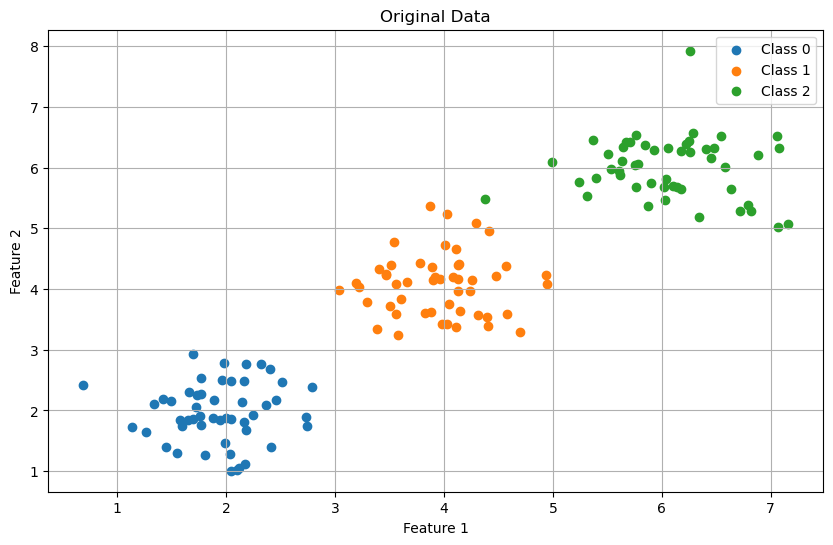

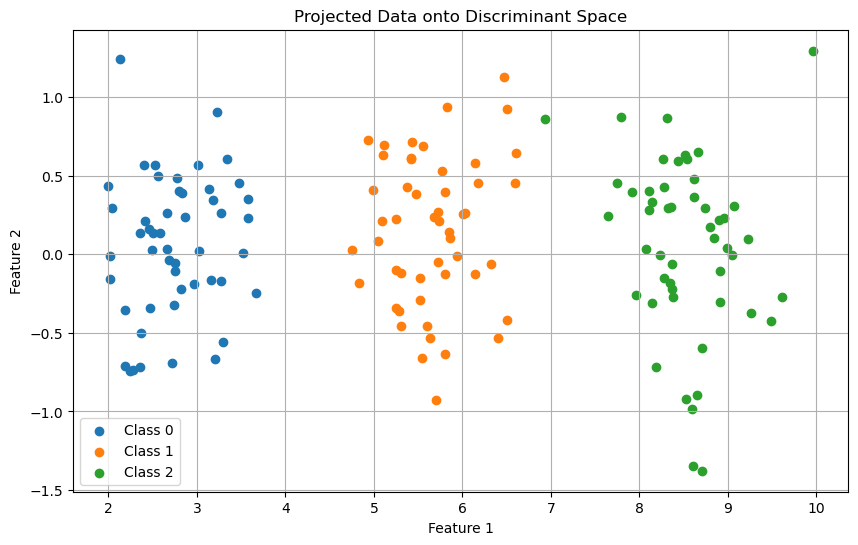

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Generation
def generate_data():
    np.random.seed(42)
    class1 = np.random.normal(loc=2, scale=0.5, size=(50, 2))  # Class 1
    class2 = np.random.normal(loc=4, scale=0.5, size=(50, 2))  # Class 2
    class3 = np.random.normal(loc=6, scale=0.5, size=(50, 2))  # Class 3
    return np.vstack([class1, class2, class3]), np.array([0]*50 + [1]*50 + [2]*50)

# Step 2: Compute Means and Scatter Matrices
def compute_scatter_matrices(X, y):
    classes = np.unique(y)
    mean_overall = np.mean(X, axis=0)
    
    # Initialize scatter matrices
    Sw = np.zeros((X.shape[1], X.shape[1]))  # Within-class scatter matrix
    Sb = np.zeros((X.shape[1], X.shape[1]))  # Between-class scatter matrix

    for cls in classes:
        X_cls = X[y == cls]
        mean_cls = np.mean(X_cls, axis=0)
        
        # Within-class scatter
        Sw += np.cov(X_cls, rowvar=False) * (X_cls.shape[0] - 1)
        
        # Between-class scatter
        n_cls = X_cls.shape[0]
        mean_diff = (mean_cls - mean_overall).reshape(-1, 1)
        Sb += n_cls * (mean_diff @ mean_diff.T)

    return Sw, Sb

# Step 3: Solve the Generalized Eigenvalue Problem
def generalized_eigenvalue_problem(Sw, Sb):
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    return eigvals, eigvecs

# Step 4: Project Data onto the Discriminant Subspace
def project_data(X, eigvecs, num_components):
    # Sort eigenvalues and eigenvectors
    indices = np.argsort(eigvals)[::-1]
    top_indices = indices[:num_components]
    
    W = eigvecs[:, top_indices]
    return X.dot(W), W

# Generate data
X, y = generate_data()

# Compute scatter matrices
Sw, Sb = compute_scatter_matrices(X, y)

# Solve the generalized eigenvalue problem
eigvals, eigvecs = generalized_eigenvalue_problem(Sw, Sb)

# Project data onto the discriminant subspace
X_projected, W = project_data(X, eigvecs, num_components=2)

# Step 5: Plotting
def plot_data(X, y, title):
    plt.figure(figsize=(10, 6))
    for cls in np.unique(y):
        plt.scatter(X[y == cls][:, 0], X[y == cls][:, 1], label=f'Class {cls}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Plot original data
plot_data(X, y, title='Original Data')

# Plot projected data
plot_data(X_projected, y, title='Projected Data onto Discriminant Space')


## K-Means Clustering

### Introduction

Clustering techniques can broadly be divided into two categories: hierarchical and non-hierarchical. One of the most widely used non-hierarchical clustering techniques is **K-Means**. The K-Means algorithm aims to minimize the sum of squared Euclidean distances between patterns and cluster centers through an iterative hill-climbing algorithm.

### Problem Definition

Given a set of $ N $ data points in a $ d $-dimensional vector space $ \mathbb{R}^d $, the goal is to partition these points into $ K $ groups (or clusters) based on a similarity/dissimilarity metric. This establishes a rule for assigning patterns to the domain of a particular cluster center.

Let the set of $ N $ data be 

$$
S = \{ x_1, x_2, \ldots, x_N \}
$$

and the \( K \) clusters be 

$$
C_1, C_2, \ldots, C_K.
$$

The clustering aims to satisfy the following conditions:

1. $$ C_i \neq \emptyset, \quad \text{for } i = 1, \ldots, K; $$
2. $$ C_i \cap C_j = \emptyset, \quad \text{for } i \neq j; $$
3. $$ \bigcup_{i=1}^{K} C_i = S. $$

Here, each observation vector belongs to the cluster with the nearest mean, which serves as the prototype of the cluster.

## Voronoi Tessellation

Given an open set $ S \in \mathbb{R}^d $, the sets $ \{ V_i \}_{i=1}^{K} $ are called a tessellation of $ S $ if 

$$
V_i \cap V_j = \emptyset \quad \text{for } i \neq j
$$

and 

$$
\bigcup_{i=1}^{K} V_i = S.
$$

When a set of points $ \{ z_i \}_{i=1}^{K} $ is given, the sets 

$$
\hat{V}_i = \{ x \in S \mid \| x - z_i \| \leq \| x - z_j \| \quad \text{for } j = 1, \ldots, K, j \neq i \}
$$

define the Voronoi tessellation or Voronoi diagram of $ S $, where each $ \hat{V}_i $ is known as the Voronoi set corresponding to the point $ z_i $.

## Parameters of the K-Means Algorithm

The K-Means algorithm requires three user-specified parameters:

1. **Number of Clusters $ K $**: The most critical parameter in K-Means is $ K $. There are no perfect mathematical criteria available to determine $ K $, so the K-Means algorithm is often run independently for different values of $ K $. The value of $ K $ is then selected based on the partition that appears most meaningful to the domain expert.
  
2. **Cluster Initialization**: The initial selection of cluster centers can affect the final clustering outcome. Various methods can be used for initialization, such as random selection or the K-Means++ algorithm.

3. **Distance Metric**: The choice of distance metric (commonly Euclidean distance) influences how the similarity between points and cluster centers is computed.

## Conclusion

K-Means Clustering is a fundamental technique in data analysis and pattern recognition, widely applied across various fields. Its simplicity and efficiency make it a popular choice, although the selection of the number of clusters and initialization can significantly impact the results.


## Cluster Initialization

To overcome the local minima of K-Means clustering, the K-Means algorithm selects $ K $ initial cluster centers $ m_1, \ldots, m_K $ randomly from the $ N $ data points $ \{ x_1, \ldots, x_N \} $.

## Distance Metric

Let $ d_{ik} $ denote the distance between data point 

$$
x_i = [x_{i1}, \ldots, x_{iN}]^T
$$

and 

$$
x_k = [x_{k1}, \ldots, x_{kN}]^T.
$$

K-Means is typically used with the Euclidean distance:

$$
d_{ik} = \sqrt{\sum_{j=1}^{N} (x_{ij} - x_{kj})^2}
$$

or the Mahalanobis distance metric for computing the distance between points $ x_i, x_k $ and cluster centers.

## Algorithm Overview

The most common algorithm uses an iterative refinement technique for finding a locally minimal solution without computing the Voronoi set $ \hat{V}_i $. Due to its ubiquity, it is often referred to simply as the K-Means algorithm. However, the K-Means algorithm, being a greedy algorithm, can only converge to a local minimum.

Given any set $ Z $ of $ K $ centers, for each center $ z \in Z $, let $ V(z) $ denote its neighborhood, namely the set of data points for which $ z $ is the nearest neighbor. Based on an elegant random sequential sampling method, the random K-Means algorithm does not require the calculation of Voronoi sets.

### Random K-Means Algorithm

**Algorithm **: Random K-means algorithm

1. **Input**: Dataset $ S = \{ x_1, \ldots, x_N \} $ with $ x_i \in \mathbb{R}^d $, a positive integer $ K $.
2. **Initialization**:
   1. Select an initial set of $ K $ centers $ Z = \{ z_1, \ldots, z_K \} $, e.g., using a Monte Carlo method.
   2. Set $ j_i = 1 $ for $ i = 1, \ldots, K $.
3. **Repeat**:
   1. Select a data point $ x \in S $ at random, according to the probability density function $ \rho(x) $.
   2. Find the $ z_i \in \mathbb{R}^d $ that is closest to $ x $:
   
   $$
   z_i = \arg \min_{z_1, \ldots, z_K} \{ \| x - z_1 \|^2, \ldots, \| x - z_K \|^2 \},
   $$
   
   denote the index of that $ z_i $ by $ i^* $. Ties are resolved arbitrarily.
   3. Set 
   
   $$
   z_{i^*} \leftarrow \frac{j_{i^*} z_{i^*} + x}{j_{i^*} + 1}
   $$
   
   and $ j_{i^*} \leftarrow j_{i^*} + 1 $. This new $ z_{i^*} $, along with the unchanged $ z_i $ for $ i \neq i^* $, forms the new set of cluster centers $ z_i $.
   4. Assign point $ x_i $, $ i = 1, \ldots, N $ to cluster $ C_j $, $ j \in \{ 1, \ldots, K \} $ if and only if:
   
   $$
   \| x_i - z_j \| \leq \| x_i - z_p \|, \quad p = 1, \ldots, K; \quad j \neq p.
   $$
   5. Exit if $ K $ cluster centers $ z_1, \ldots, z_K $ have converged.
4. **Output**: $ K $ cluster centroids $ z_1, \ldots, z_K $.

## Classification of New Data Points

Once the $ K $ cluster centers $ z_1, \ldots, z_K $ are obtained, we can classify a new testing data point $ y \in \mathbb{R}^d $ as follows:

$$
\text{class of } y = \text{order number of } z_k = \arg \min_{k} \{ d(y, z_1), \ldots, d(y, z_K) \}
$$

where $ d(y, z) $ is the distance metric.

## Initialization and Pre-processing

The classic K-Means clustering algorithm finds cluster centers that minimize the distance between data points and the nearest center. K-Means can be viewed as a way of constructing a "dictionary" $ D \in \mathbb{R}^{n \times k} $ of $ k $ vectors so that a data vector $ x_i \in \mathbb{R}^n $ can be mapped to a code vector $ s_i $ that minimizes the reconstruction error.

### Important Steps

1. Although it is common to initialize K-Means with randomly chosen examples drawn from the data, this has been found to be a poor choice. Instead, it is better to randomly initialize the centroids from a normal distribution and then normalize them to unit length.
   
2. The centroids tend to be biased by the correlated data. By whitening the input data, the obtained centroids are more orthogonal.

### Full K-Means Training Procedure

1. **Normalize inputs**:
   
   $$
   \hat{x}_i = \frac{x_i - \text{mean}(x_i)}{\text{var}(x_i)} \quad \forall i.
   $$

2. **Whiten inputs**:
   
   $$
   \text{cov}(x) = V D V^T
   $$
   
   $$
   \hat{x}_i = V (D + \epsilon)^{-1/2} V^T x_i \quad \forall i.
   $$

3. **Loop until convergence (typically 10 iterations is enough)**:
   
   $$
   s_i(j) = \begin{cases}
   d_j(x_i), & \text{if } j = \arg \max_{l} |d_l(x_i)| \\
   0, & \text{otherwise}.
   \end{cases}
   $$
   
   $$
   D = X S^T + D,
   $$
   
   $$
   d_j = \frac{d_j}{\| d_j \|^2}, \quad \forall j.
   $$

The columns $ d_j $ of the dictionary $ D $ give the centroids, and K-Means tends to learn low-frequency edge-like centroids.

This procedure of normalization, whitening, and K-Means clustering is an effective “off-the-shelf” unsupervised learning module that can serve in many feature-learning roles.


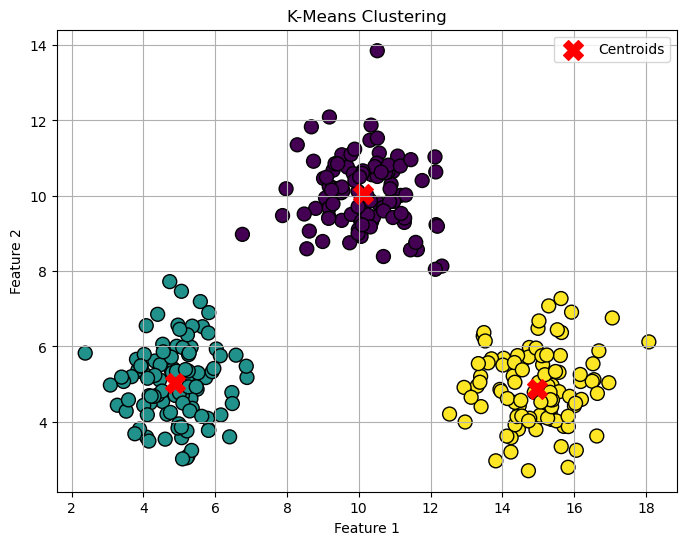

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def initialize_centroids(X, K):
    """Randomly select K data points as initial centroids."""
    random_indices = np.random.choice(len(X), K, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))  # Assign to the closest centroid
    return np.array(clusters)

def update_centroids(X, clusters, K):
    """Update the centroid positions based on current cluster assignments."""
    centroids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        if len(cluster_points) > 0:  # Avoid division by zero
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = np.zeros(X.shape[1])  # If no points, keep the centroid at origin
        centroids.append(new_centroid)
    return np.array(centroids)

def k_means(X, K, max_iters=100):
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)
        if np.all(centroids == new_centroids):  # Check for convergence
            break
        centroids = new_centroids
    return clusters, centroids

def plot_clusters(X, clusters, centroids):
    """Visualize the clustered data and centroids."""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Generate random data
    np.random.seed(42)
    X1 = np.random.randn(100, 2) + np.array([5, 5])  # Cluster 1
    X2 = np.random.randn(100, 2) + np.array([10, 10])  # Cluster 2
    X3 = np.random.randn(100, 2) + np.array([15, 5])  # Cluster 3
    X = np.vstack((X1, X2, X3))  # Combine clusters into one dataset

    # Perform K-Means clustering
    K = 3  # Number of clusters
    clusters, centroids = k_means(X, K)

    # Plot the results
    plot_clusters(X, clusters, centroids)


# Spectral Clustering

Spectral clustering is one of the most popular modern clustering algorithms and has been extensively studied in the image processing, data mining, and machine learning communities.

In multivariate statistics and the clustering of data, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the data set.

## Spectral Clustering Algorithms

It is assumed that data consists of $ N $ “points” $ x_1, \ldots, x_N $ which can be arbitrary objects. Let their pairwise similarities $ s_{ij} = s(x_i, x_j) $ be measured by using some similarity function which is symmetric and nonnegative, and denote the corresponding similarity matrix by 

$$
S = [s_{ij}]_{N,N} \quad (i,j = 1).
$$

Two popular spectral clustering algorithms are based on spectral graph partitioning. A promising alternative is to use a matrix algebra approach.

Let $ h_k $ be a cluster that partitions the mapped data $ \Phi = [\phi(x_1), \ldots, \phi(x_N)] $, producing the output $ \Phi_h $. Maximize the output energy to get 

$$
\max_{h} \| \Phi_h \|_2^2 = h_k^T \Phi^T \Phi h_k = h_k^T W h_k,
$$

where 

$$
W = \Phi^T \Phi = [K(x_i, x_j)]_{i,j=1}^{N,N}.
$$

In spectral clustering, due to $ K(x_i, x_j) = s(x_i, x_j) $, the affinity matrix $ W $ becomes the similarity matrix $ S $, i.e., 

$$
W = S.
$$

For $ K $ clusters, we maximize the total output energy:

$$
\max_{h_1, \ldots, h_K} \sum_{k=1}^{K} h_k^T W h_k
$$

subject to 

$$
h_k^T h_k = 1, \quad \forall k = 1, \ldots, K.
$$

To obtain the primal constrained optimization problem:

$$
\max_H \, \text{tr}(H^T W H) \tag{6.13.4}
$$

where 

$$
H = [h_1, \ldots, h_K] 
$$

subject to 

$$
H^T H = I. \tag{6.13.5}
$$

By using the Lagrange multiplier method, the above constrained optimization can be rewritten as the dual unconstrained optimization:

$$
\max_H \, L(H) = \text{tr}(H^T W H) + \lambda (1 - \|H\|_2^2). \tag{6.13.6}
$$

From the first-order optimality condition, we have

$$
\frac{\partial L}{\partial H} = 0 \Rightarrow 2WH - 2\lambda H = 0 \Rightarrow WH = \lambda H. \tag{6.13.7}
$$

Due to the symmetry of the affinity matrix $ W = S $, it follows that $ H = [h_1, \ldots, h_K] $ consists of the $ K $ leading eigenvectors (with the largest eigenvalues) of $ W $ as columns.

If the affinity matrix $ W $ is replaced by the normalized Laplacian matrix 

$$
L_{\text{sys}} = I - D^{-1/2} W D^{-1/2}
$$ 

then the $ K $ spectral clusters $ h_1, \ldots, h_K$ are given directly by the $ K $ leading eigenvectors. This is just the key point of the normalized spectral clustering algorithm developed by Ng et al., see Algorithm below.

## Algorithm - Normalized Spectral Clustering Algorithm of Ng et al. 

1. **Input**: Dataset $ V = \{x_1, \ldots, x_N\} $ with $ x_i \in \mathbb{R}^n $, number $ k $ of clusters, kernel function $ K(x_i, x_j) : \mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R} $.
2. Construct the $ N \times N $ weighted adjacency matrix 
   $$ 
   W = [\delta_{ij} K(x_i, x_j)]_{i,j=1}^{N,N}. 
   $$
3. Compute the $ N \times N $ diagonal matrix $ [D]_{ij} = \delta_{ij} \sum_{j=1}^N w_{ij} $.
4. Compute the $ N \times N $ normalized Laplacian matrix 
   $$ 
   L_{\text{sys}} = I - D^{-1/2} W D^{-1/2}. 
   $$
5. Compute the first $ k $ eigenvectors $ u_1, \ldots, u_k $ of the eigenvalue problem 
   $$ 
   L_{\text{sys}} u = \lambda u.
   $$
6. Let the matrix $ U = [u_1, \ldots, u_k] \in \mathbb{R}^{N \times k} $.
7. Compute the $ (i, j) $-th entries of the $ N \times k $ matrix $ T = [t_{ij}]_{i,j=1}^{N,k} $ as 
   $$ 
   t_{ij} = \frac{u_{ij}}{\sqrt{\sum_{m=1}^k u_{im}}}. 
   $$
   Let $ y_i = [t_{i1}, \ldots, t_{ik}] \in \mathbb{R}^k, \, i = 1, \ldots, N. $
8. Cluster the points \( y_1, \ldots, y_N \) via the K-means algorithm into clusters $ C_1, \ldots, C_k $.
9. **Output**: Clusters $ A_1, \ldots, A_k $ with $ A_i = \{j \,|\, y_j \in C_i\} $.

Interestingly, if letting $ \tilde{H} = D^{1/2} H $ and $ \tilde{W} = D^{-1/2} W D^{-1/2} $, then the solution to the optimization problem 

$$
\max_H \, L(\tilde{H}) = \text{tr}(\tilde{H}^T \tilde{W} \tilde{H}) + \lambda (1 - \|\tilde{H}\|_2^2) \tag{6.13.8}
$$


In [14]:
import random

# Step 1: Create a synthetic dataset for clustering
def generate_data(num_points=100):
    """Generates random data points for clustering."""
    data = []
    for _ in range(num_points):
        data.append([random.uniform(0, 10), random.uniform(0, 10)])
    return data

# Step 2: Compute the similarity matrix
def compute_similarity_matrix(data):
    """Computes the similarity matrix based on Euclidean distance."""
    N = len(data)
    similarity_matrix = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            if i != j:
                distance = sum((data[i][k] - data[j][k]) ** 2 for k in range(len(data[i])))
                similarity_matrix[i][j] = 1 / (1 + distance)  # Use a Gaussian-like kernel
    return similarity_matrix

# Step 3: Compute the degree matrix
def compute_degree_matrix(similarity_matrix):
    """Computes the degree matrix from the similarity matrix."""
    N = len(similarity_matrix)
    degree_matrix = [[0] * N for _ in range(N)]
    for i in range(N):
        degree_matrix[i][i] = sum(similarity_matrix[i])
    return degree_matrix

# Step 4: Compute the normalized Laplacian matrix
def compute_normalized_laplacian(similarity_matrix):
    """Computes the normalized Laplacian matrix."""
    D = compute_degree_matrix(similarity_matrix)
    N = len(D)
    
    # Compute D^(-1/2)
    D_inv_sqrt = [[0] * N for _ in range(N)]
    for i in range(N):
        if D[i][i] != 0:
            D_inv_sqrt[i][i] = 1 / (D[i][i] ** 0.5)
    
    # L_sys = I - D^(-1/2) * S * D^(-1/2)
    L = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            L[i][j] = (1 if i == j else 0) - D_inv_sqrt[i][i] * similarity_matrix[i][j] * D_inv_sqrt[j][j]
    
    return L

# Step 5: Compute the eigenvectors of the Laplacian matrix
def compute_eigenvectors(laplacian_matrix, k):
    """Computes the k leading eigenvectors of the Laplacian matrix."""
    # Simple implementation using power iteration for the leading eigenvector
    # Not suitable for large matrices, but illustrative for simplicity
    def power_iteration(matrix, num_simulations: int):
        b_k = [random.uniform(0, 1) for _ in range(len(matrix))]
        for _ in range(num_simulations):
            # Calculate the matrix-by-vector product Ab
            b_k1 = [sum(matrix[i][j] * b_k[j] for j in range(len(matrix))) for i in range(len(matrix))]
            # Normalize the vector
            b_k1_norm = sum(x ** 2 for x in b_k1) ** 0.5
            b_k = [x / b_k1_norm for x in b_k1]
        return b_k

    eigenvectors = []
    for _ in range(k):
        eigenvector = power_iteration(laplacian_matrix, 100)
        eigenvectors.append(eigenvector)
        # Deflate the matrix to find next eigenvector (simplified)
        for i in range(len(laplacian_matrix)):
            for j in range(len(laplacian_matrix)):
                laplacian_matrix[i][j] -= eigenvector[i] * eigenvector[j]
    
    return eigenvectors

# Step 6: K-Means clustering on the reduced space
def kmeans_clustering(data, k):
    """Performs K-Means clustering on the data."""
    centroids = random.sample(data, k)
    for _ in range(10):  # Iterate a fixed number of times
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [sum((point[i] - centroid[i]) ** 2 for i in range(len(point))) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        
        for i in range(k):
            if clusters[i]:  # Avoid division by zero
                centroids[i] = [sum(dim) / len(clusters[i]) for dim in zip(*clusters[i])]
    
    return clusters

# Putting it all together
def spectral_clustering(num_points=100, k=3):
    data = generate_data(num_points)
    similarity_matrix = compute_similarity_matrix(data)
    laplacian_matrix = compute_normalized_laplacian(similarity_matrix)
    eigenvectors = compute_eigenvectors(laplacian_matrix, k)
    
    # Normalize eigenvectors for clustering
    normalized_vectors = [[eigenvector[i] / sum(eigenvector) for i in range(len(eigenvector))] for eigenvector in eigenvectors]
    clusters = kmeans_clustering(normalized_vectors, k)
    
    return clusters

# Run the spectral clustering
clusters = spectral_clustering()
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1}: {cluster}")


Cluster 1: [[8.975710030704889, -2.4106466060304603, 6.370586727454403, 1.8628787280429728, -0.8095003783002453, -0.22847706915164548, -0.6714568910357819, 11.19925195363873, 0.40835989883137985, 43.35501275464205, -29.121228524390816, 1.992027908789477, -0.08212657990654484, 0.7134972748444884, -19.66857604635318, -0.5576509729750642, 30.19470041128576, 0.8072364814321987, 4.841876655607562, 6.647214412735202, 0.8312471971906803, 2.7051779522306716, -3.534790562760717, -35.255139570370005, -2.837489745937439, -0.41864544691320715, 1.296525253428887, 3.089716817398314, 36.86838614058397, -0.2116883494960895, -3.8098175807788874, 0.4494433845036608, 9.399806841158535, 3.5570131463593073, -2.4464581430445893, 0.2296087174812288, 0.3583946378383343, 0.25599212493942153, 0.6377727510689837, -19.7267565749151, 1.4177178607913095, -0.06756030550865809, -1.594285956963562, 18.928256280110812, 8.777500040545686, 3.4190016846673195, -0.1359926295542527, -0.06446183910895152, 0.25696987110153513

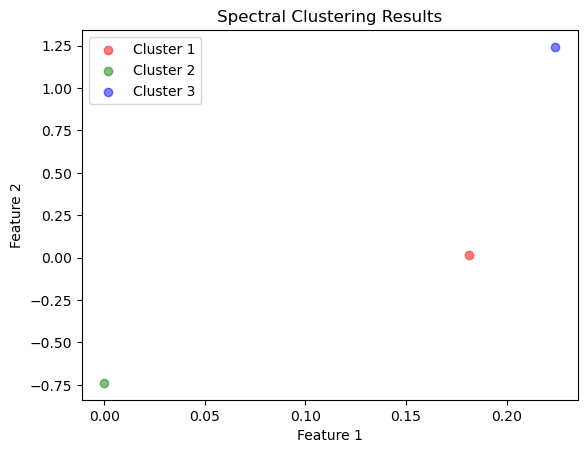

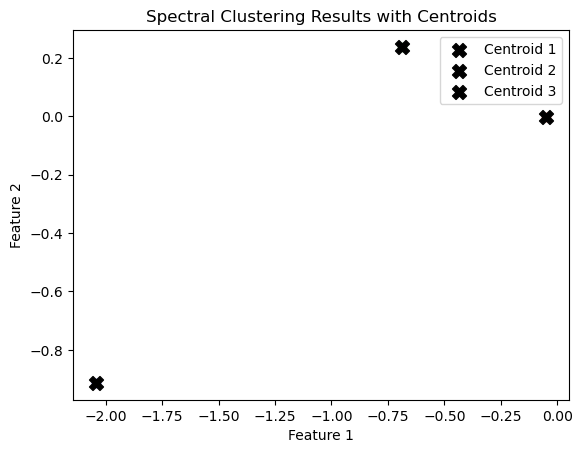

In [16]:
import matplotlib.pyplot as plt

def plot_clusters(clusters):
    """Plots the clusters with different colors."""
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Color palette
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            plt.scatter(point[0], point[1], color=colors[idx % len(colors)], alpha=0.5, label=f'Cluster {idx + 1}')
    
    plt.title('Spectral Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Generate data, run spectral clustering, and plot
clusters = spectral_clustering(num_points=100, k=3)
plot_clusters(clusters)
def plot_clusters_with_centroids(clusters, centroids):
    """Plots the clusters with centroids marked."""
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            plt.scatter(point[0], point[1], color=colors[idx % len(colors)], alpha=0.5)
        
        # Plot the centroid of the cluster
        centroid = centroids[idx]
        plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=100, label=f'Centroid {idx + 1}')
    
    plt.title('Spectral Clustering Results with Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Adjust the K-means function to return centroids
def kmeans_clustering_with_centroids(data, k):
    """Performs K-Means clustering and returns centroids."""
    centroids = random.sample(data, k)
    for _ in range(10):  # Iterate a fixed number of times
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [sum((point[i] - centroid[i]) ** 2 for i in range(len(point))) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)
        
        centroids = []
        for i in range(k):
            if clusters[i]:  # Avoid division by zero
                new_centroid = [sum(dim) / len(clusters[i]) for dim in zip(*clusters[i])]
                centroids.append(new_centroid)
    
    return clusters, centroids

# Update spectral_clustering to get centroids
def spectral_clustering_with_centroids(num_points=100, k=3):
    data = generate_data(num_points)
    similarity_matrix = compute_similarity_matrix(data)
    laplacian_matrix = compute_normalized_laplacian(similarity_matrix)
    eigenvectors = compute_eigenvectors(laplacian_matrix, k)
    
    # Normalize eigenvectors for clustering
    normalized_vectors = [[eigenvector[i] / sum(eigenvector) for i in range(len(eigenvector))] for eigenvector in eigenvectors]
    clusters, centroids = kmeans_clustering_with_centroids(normalized_vectors, k)
    
    return clusters, centroids

# Run the updated clustering and plot
clusters, centroids = spectral_clustering_with_centroids(num_points=100, k=3)
plot_clusters_with_centroids(clusters, centroids)


# Normalized Spectral Clustering

## Notation

1. **Input Dataset**: Let $ V = \{ x_1, \ldots, x_N \} $ with $ x_i \in \mathbb{R}^n $.
2. **Number of Clusters**: Let $ k $ be the number of clusters.
3. **Kernel Function**: The kernel function is defined as $ K(x_i, x_j) : \mathbb{R}^n \times \mathbb{R}^n \to \mathbb{R} $.

## Steps of the Algorithm

1. **Construct the Weighted Adjacency Matrix**:
   $$
   W = [\delta_{ij} K(x_i, x_j)]_{i,j=1}^N
   $$

2. **Compute the Degree Matrix**:
   $$
   D_{ij} = \delta_{ij} \sum_{j=1}^N W_{ij}
   $$

3. **Compute the Normalized Laplacian Matrix**:
   $$
   L_{\text{sys}} = D^{-1/2} (D - W) D^{-1/2}
   $$

4. **Solve the Generalized Eigenvalue Problem**:
   $$
   L_{\text{sys}} \mathbf{u} = \lambda \mathbf{D} \mathbf{u}
   $$

5. **Eigenvalue Problem Reduction**:
   $$
   \mathbf{H} = [h_1, \ldots, h_k] \implies W \mathbf{H} = \lambda D \mathbf{H}
   $$

6. **Normalize the Eigenvectors**:
   $$
   t_{ij} = \frac{u_{ij}}{\sqrt{\sum_{m=1}^k u_{im}}}
  $$
   where $ y_i = [t_{i1}, \ldots, t_{ik}]^T \in \mathbb{R}^k $.

7. **Cluster the Points Using K-Means**:
   Assign clusters $ C_j $ for $ j \in \{1, \ldots, k\} $ based on the $ y_i $.

8. **Output Clusters**:
   $$
   A_i = \{ j \mid y_j \in C_i \}
   $$


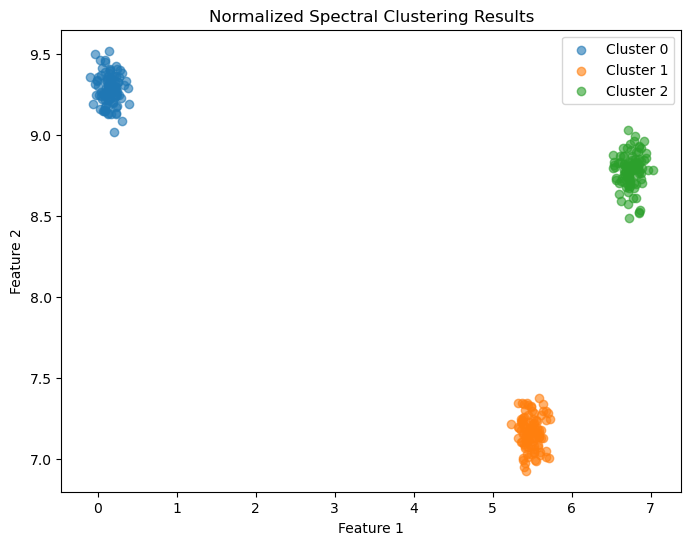

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.linalg import eigh

def generate_data(num_points=100, clusters=3, noise=0.1):
    """Generates synthetic data for clustering."""
    np.random.seed(0)
    data = []
    for i in range(clusters):
        center = np.random.rand(2) * 10  # Random center in range [0, 10)
        cluster_data = center + noise * np.random.randn(num_points, 2)  # Add noise
        data.append(cluster_data)
    return np.vstack(data)

def compute_adjacency_matrix(data, sigma=1.0):
    """Computes the weighted adjacency matrix based on Gaussian kernel."""
    n = data.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                W[i, j] = np.exp(-np.linalg.norm(data[i] - data[j])**2 / (2 * sigma**2))
    return W

def compute_degree_matrix(W):
    """Computes the degree matrix."""
    return np.diag(np.sum(W, axis=1))

def compute_normalized_laplacian(D, W):
    """Computes the normalized Laplacian matrix."""
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
    L = D - W
    L_norm = D_inv_sqrt @ L @ D_inv_sqrt
    return L_norm

def spectral_clustering(data, k):
    """Performs normalized spectral clustering."""
    W = compute_adjacency_matrix(data)
    D = compute_degree_matrix(W)
    L = compute_normalized_laplacian(D, W)

    # Solve the generalized eigenvalue problem L * u = lambda * D * u
    eigenvalues, eigenvectors = eigh(L, D)
    idx = np.argsort(eigenvalues)  # Sort eigenvalues
    U = eigenvectors[:, idx[:k]]   # Take the first k eigenvectors

    # Normalize rows of U
    Y = U / np.linalg.norm(U, axis=1, keepdims=True)

    # Run K-Means on normalized eigenvectors
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(Y)

    return labels

def plot_clusters(data, labels):
    """Plots the clustered data."""
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        plt.scatter(data[labels == label, 0], data[labels == label, 1],
                    label=f'Cluster {label}', cmap='viridis', alpha=0.6)

    plt.title('Normalized Spectral Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Main execution
num_points = 100
data = generate_data(num_points=num_points, clusters=3)
k = 3  # Number of clusters
labels = spectral_clustering(data, k)
plot_clusters(data, labels)
